In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

In [2]:
# import 5-year historical data from yahoo finance
# tickers: CHK, USO, XLE, SPY
CHK = pd.read_csv('C:/Anaconda3/QF/blog/CHK.csv', parse_dates=['Date'], index_col=['Date'])
USO = pd.read_csv('C:/Anaconda3/QF/blog/USO.csv', parse_dates=['Date'], index_col=['Date'])
XLE = pd.read_csv('C:/Anaconda3/QF/blog/XLE.csv', parse_dates=['Date'], index_col=['Date'])
SPY = pd.read_csv('C:/Anaconda3/QF/blog/SPY.csv', parse_dates=['Date'], index_col=['Date'])

In [3]:
# create a new dataframe with adj close and take the log diff
CHK_corr = pd.DataFrame()
CHK_corr['CHK'] = CHK['Adj Close'].apply(lambda x: np.log(x)).diff()
CHK_corr['USO'] = USO['Adj Close'].apply(lambda x: np.log(x)).diff()
CHK_corr['XLE'] = SPY['Adj Close'].apply(lambda x: np.log(x)).diff()
CHK_corr['SPY'] = SPY['Adj Close'].apply(lambda x: np.log(x)).diff()

In [4]:
CHK_corr.head()

,CHK,USO,XLE,SPY
Date,,,,
2013-05-14,nan,nan,nan,nan
2013-05-15,-0.00483,0.00149,0.00537,0.00537
2013-05-16,-0.03798,0.00771,-0.00471,-0.00471
2013-05-17,0.01892,0.00999,0.00963,0.00963
2013-05-20,0.02581,0.00670,-0.00006,-0.00006


In [5]:
# check how many null values
CHK_corr.isnull().sum()
# only 1 for the log diff

CHK    1
USO    1
XLE    1
SPY    1
dtype: int64

In [6]:
CHK_corr.dropna(axis=0, inplace=True)

In [7]:
CHK_corr.head()

,CHK,USO,XLE,SPY
Date,,,,
2013-05-15,-0.00483,0.00149,0.00537,0.00537
2013-05-16,-0.03798,0.00771,-0.00471,-0.00471
2013-05-17,0.01892,0.00999,0.00963,0.00963
2013-05-20,0.02581,0.00670,-0.00006,-0.00006
2013-05-21,0.00240,-0.00963,0.00144,0.00144


Text(0.5,1,'Scatterplot of CHK & USO')

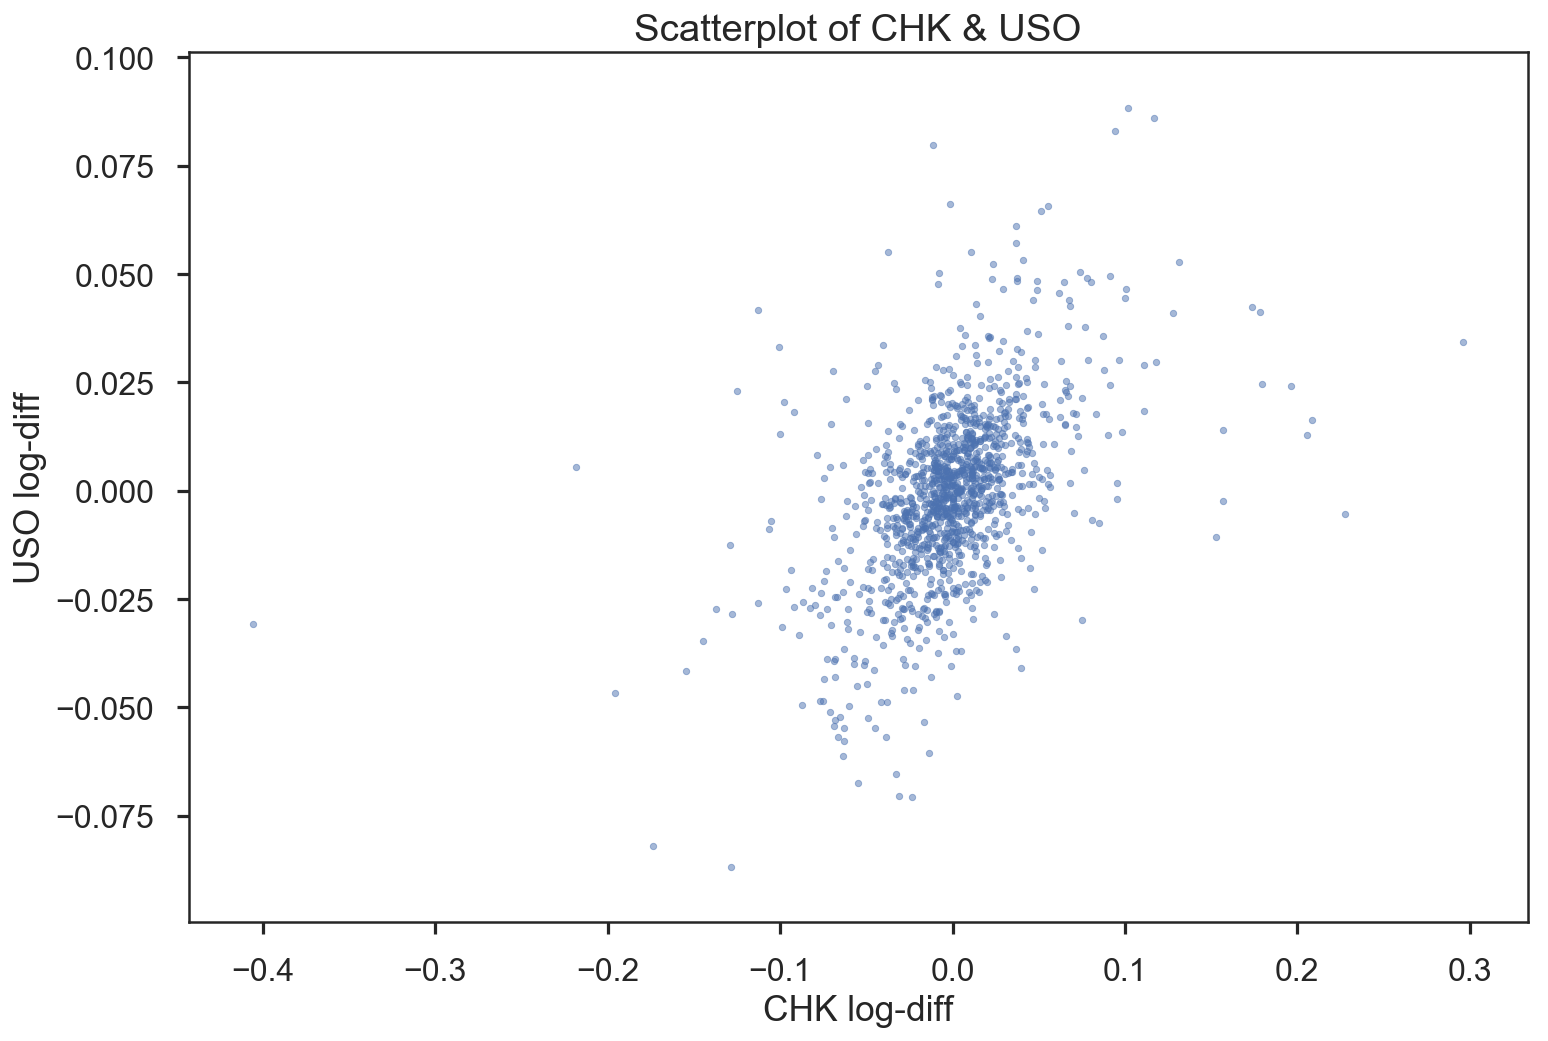

In [8]:
# scatterplot of CHK & USO price changes
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
ax1.scatter(CHK_corr['CHK'], CHK_corr['USO'], s=10, alpha=0.5)
ax1.set_xlabel('CHK log-diff')
ax1.set_ylabel('USO log-diff')
ax1.set_title('Scatterplot of CHK & USO')

In [9]:
# historical 5-year correlation
corr_5yr = np.correlate(CHK_corr['CHK'], CHK_corr['USO'])
print('5-Yr Correlation: ' + str(corr_5yr))

5-Yr Correlation: [0.52493]


In [10]:
# function to calculate correlation of a specified period of days over time    
def corr_days(x, y, start, end):
    corr_days = []

    for num in range(end,len(x)):
        corr = np.correlate(x.iloc[start:end], y.iloc[start:end])
        corr_days.append(corr)
        start +=1
        end +=1
    return corr_days

In [11]:
# for formatting x-axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

# function to print charts for specified time-intervals
def corr_days_plot(x, y, title, figsize=(14,8)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(str(title), fontsize=25)
    layout = (3, 2)
    
    corr_01 = plt.subplot2grid(layout, (0, 0))
    corr_20 = plt.subplot2grid(layout, (0, 1))
    corr_60 = plt.subplot2grid(layout, (1, 0))
    corr_120 = plt.subplot2grid(layout, (1, 1))
    corr_250 = plt.subplot2grid(layout, (2, 0))
    corr_500 = plt.subplot2grid(layout, (2, 1))
    
    corrs = [corr_01, corr_20, corr_60, corr_120, corr_250, corr_500]
    t_int = [1, 20, 60, 120, 250, 500]
    for corr in corrs:
        days = t_int[(corrs.index(corr))]
        
        corr.plot(CHK_corr.iloc[days:].index, corr_days(x, y, 0, days), linewidth=2)
        corr.set_title(str(days) + "-day correlation")
        
        corr.xaxis.set_ticks_position('bottom')
        corr.xaxis.set_major_locator(years)
        corr.xaxis.set_major_formatter(yearsFmt)
        corr.xaxis.set_minor_locator(months)
        
        corr.set_xlim('2015', CHK_corr.index[-1])
        
        corr.grid(b=True, which='major', linestyle='--', linewidth=.75)
        corr.grid(b=True, which='minor', linestyle='--', linewidth=.50)
        
    sns.despine()
    fig.tight_layout()
    return

# Correlation between CHK & USO

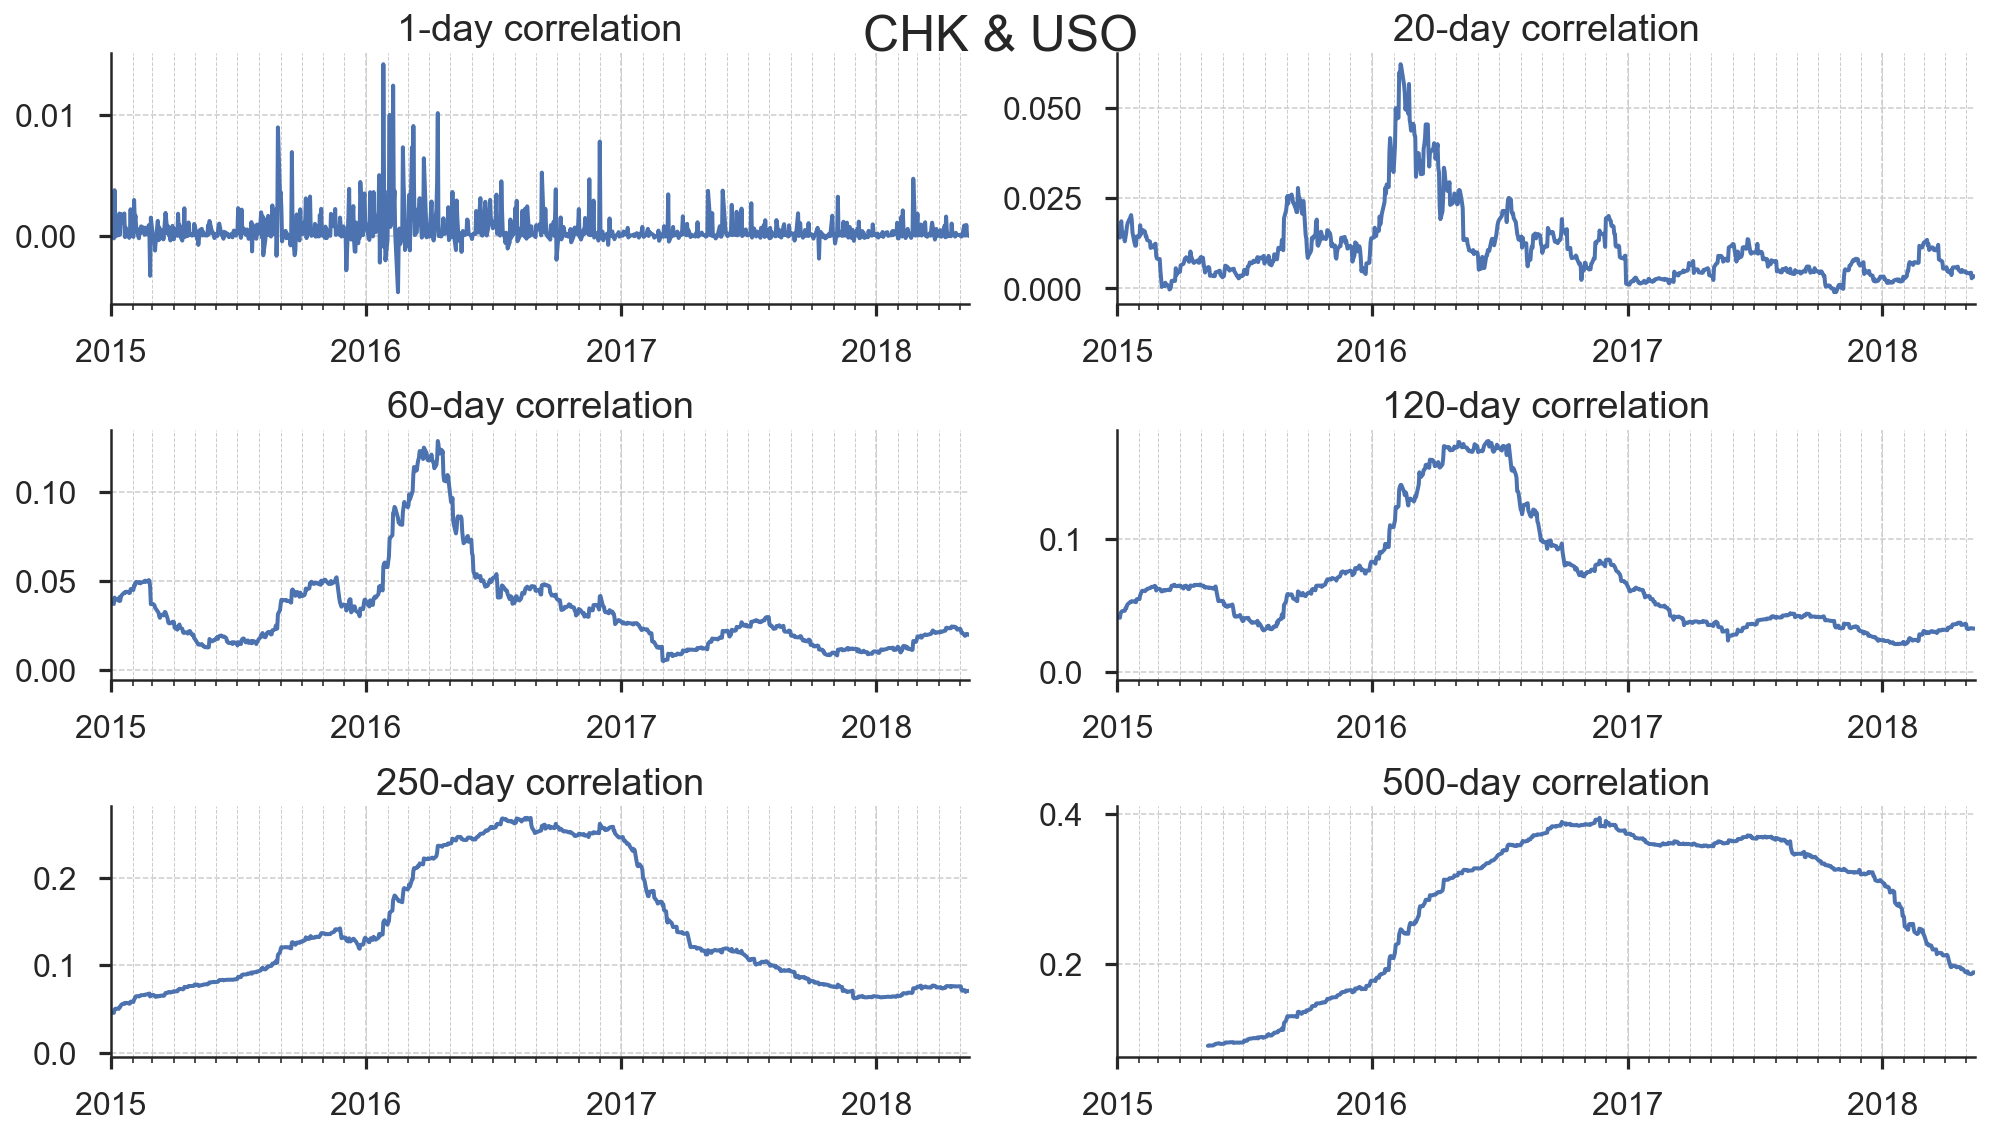

In [12]:
corr_days_plot(CHK_corr['CHK'], CHK_corr['USO'], 'CHK & USO')
# x_axis : date
# y-axis : correlation

# Correlation between CHK & SPY

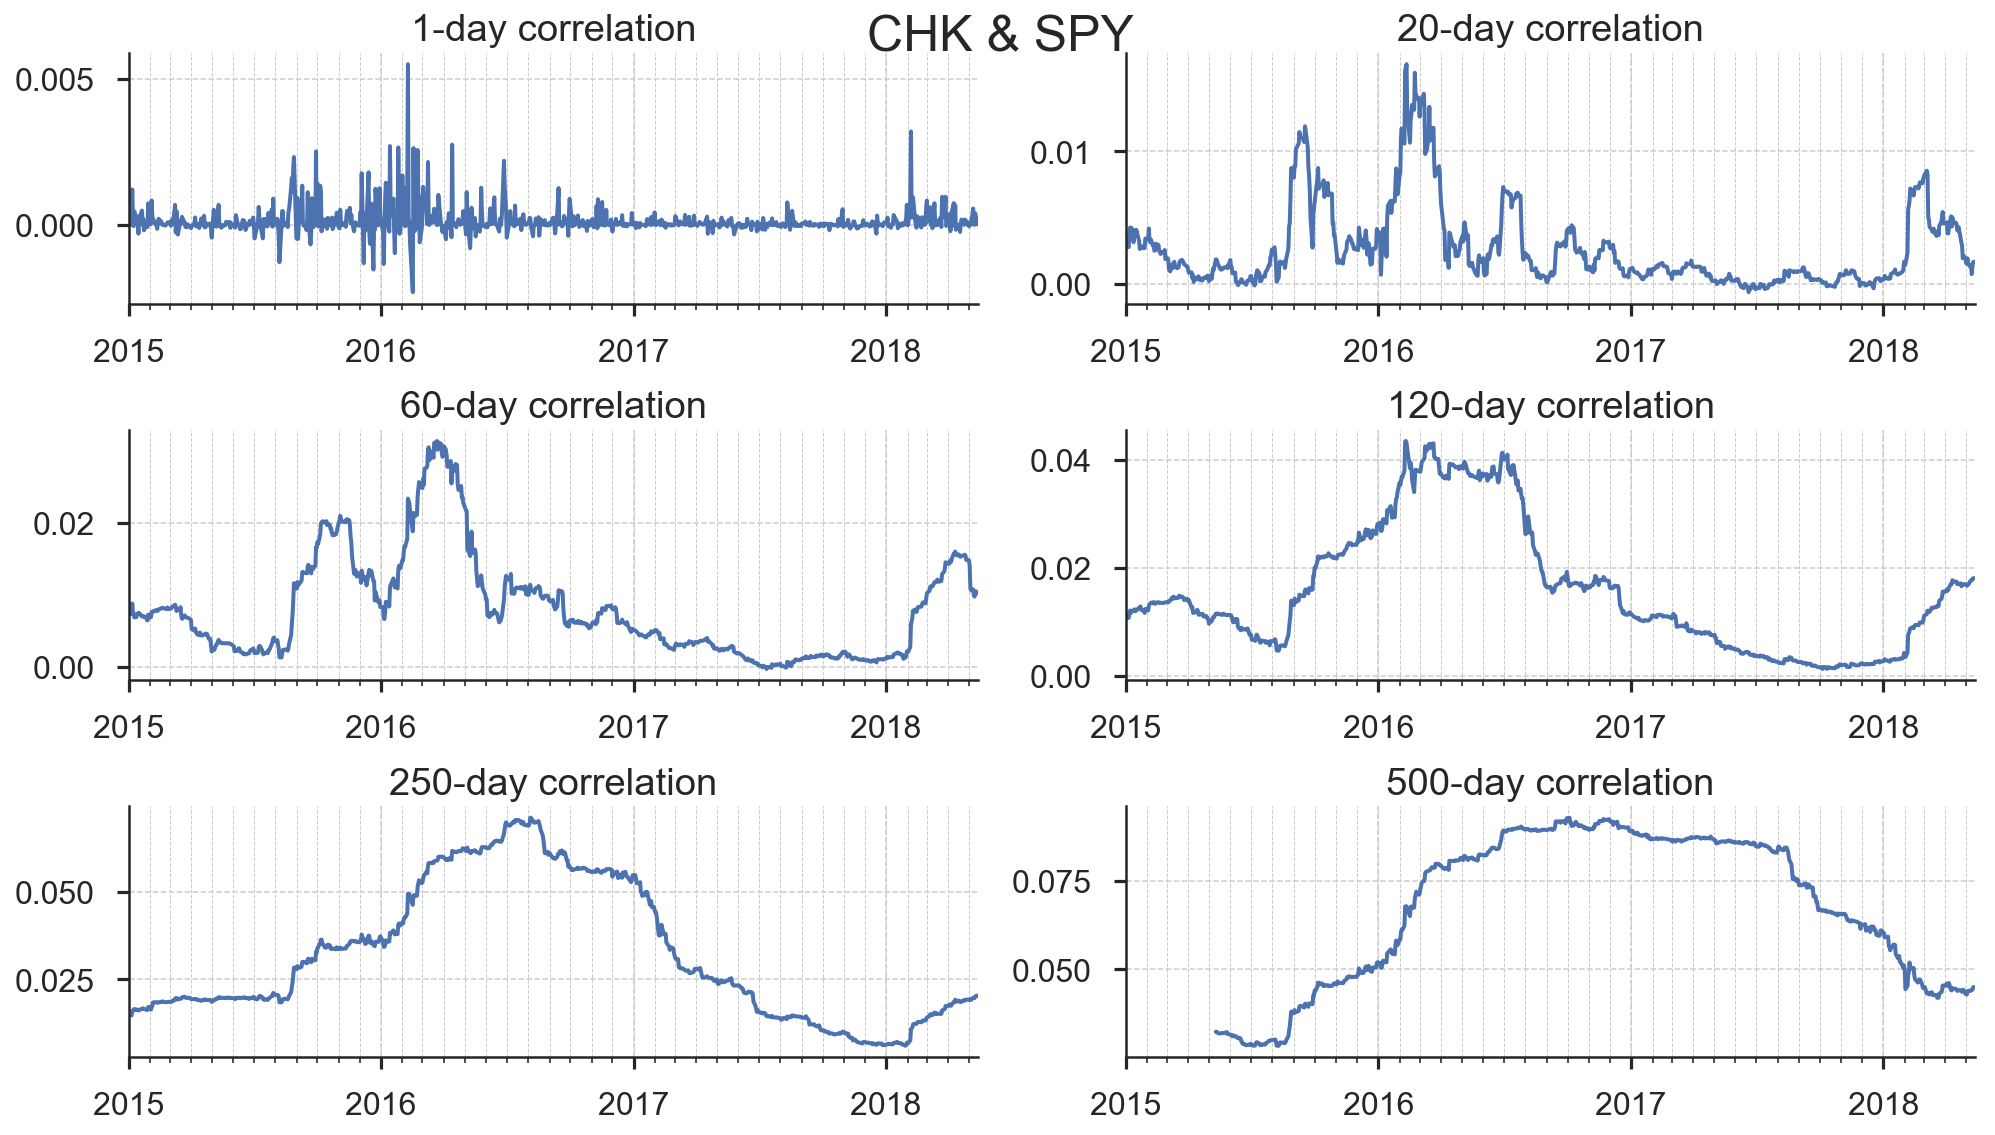

In [13]:
corr_days_plot(CHK_corr['CHK'], CHK_corr['SPY'], 'CHK & SPY')

# Correlation between CHK & XLE

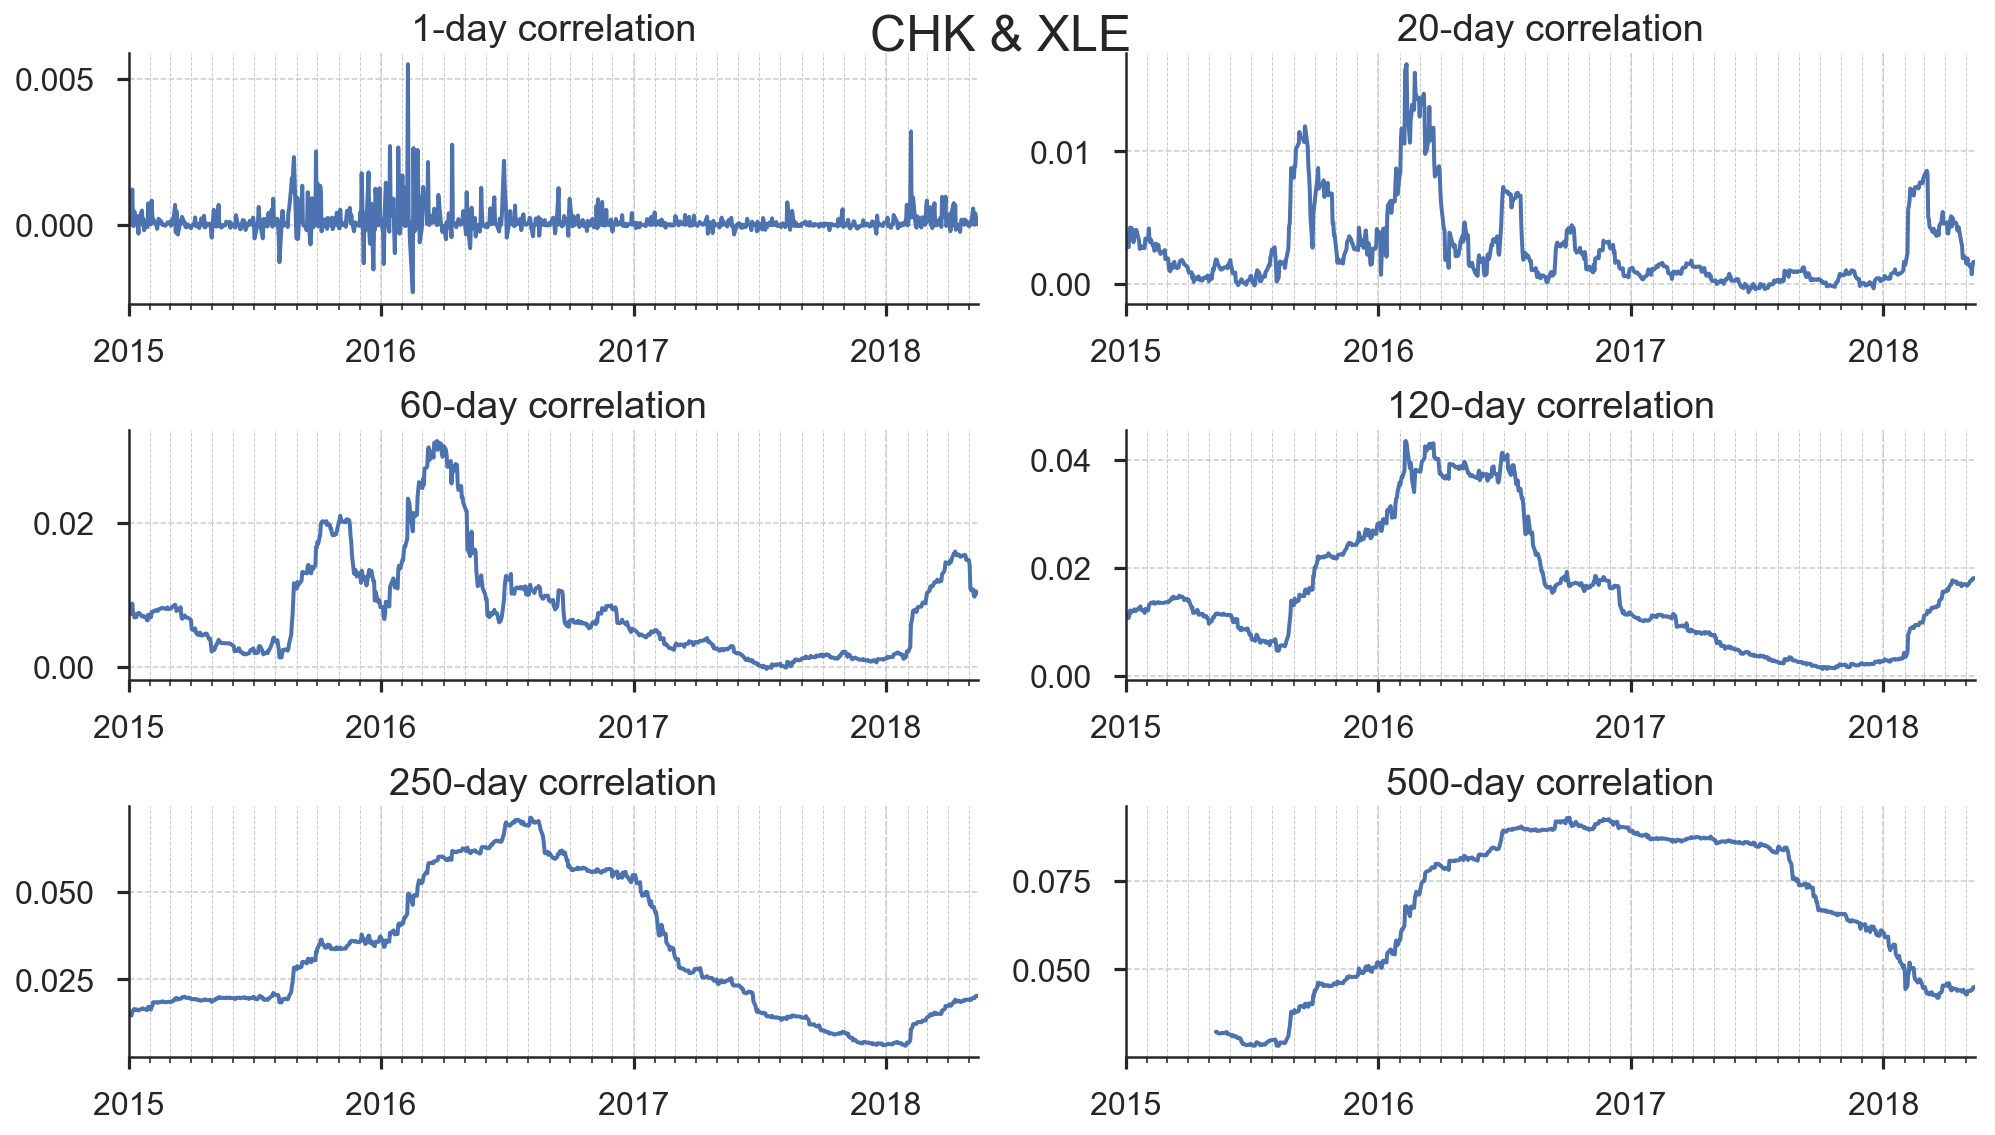

In [14]:
corr_days_plot(CHK_corr['CHK'], CHK_corr['XLE'], 'CHK & XLE')